#Final Project - Undergraduate
By: Mary Callicotte and Bryan White

##Goals
Our goal is to explore how different features affect the performace of machine learning. We will be using this [credit risk assessment dataset](https://archive.ics.uci.edu/ml/datasets/Credit+Approval) to explore how each feature affects the performace of a Random Forest Classifer.

In [ ]:
# Task 0
# Global Variables
seed = 16112022

#Task 1: Upload dataset

In [ ]:
#Task 1
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
nameArray = range(0, 16)
df = pd.read_csv(url, header=None, names=nameArray, na_values="?", index_col=False)
df = df.dropna()
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


#Task 2: Prepare 5-fold Validation sets

In [ ]:
# Task 2
# requires task 1


#does not use the cross validation method I found
labels = df[15]
features = df[range(0, 15)]

# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      #using print because newlines looks nicer (you can undo this if you want)
      print("Training Accuracy scores: ", results['train_accuracy'],
              "\nMean Training Accuracy:", results['train_accuracy'].mean()*100,
              "\nTraining Precision scores:", results['train_precision'],
              "\nMean Training Precision:", results['train_precision'].mean(),
              "\nTraining Recall scores:", results['train_recall'],
              "\nMean Training Recall:", results['train_recall'].mean(),
              "\nTraining F1 scores:", results['train_f1'],
              "\nMean Training F1 Score:", results['train_f1'].mean(),
              "\nValidation Accuracy scores:", results['test_accuracy'],
              "\nMean Validation Accuracy:", results['test_accuracy'].mean()*100,
              "\nValidation Precision scores:", results['test_precision'],
              "\nMean Validation Precision:", results['test_precision'].mean(),
              "\nValidation Recall scores:", results['test_recall'],
              "\nMean Validation Recall:", results['test_recall'].mean(),
              "\nValidation F1 scores:", results['test_f1'],
              "\nMean Validation F1 Score:", results['test_f1'].mean())
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestClassifier(random_state = seed)

#https://stackoverflow.com/questions/30384995/randomforestclassfier-fit-valueerror-could-not-convert-string-to-float
#You may not pass str to fit this kind of classifier.

#- = 0
#+ = 1
labels =labels.replace("+", 1)
labels =labels.replace("-", 0)

#convert data from strings
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in features.columns:
        if features[column_name].dtype == object:
            features[column_name] = le.fit_transform(features[column_name])
        else:
            pass
#print(cross_validation(modelRFC, features, labels))
RFC_result= cross_validation(modelRFC, features, labels)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Training Accuracy scores:  [1. 1. 1. 1. 1.] 
Mean Training Accuracy: 100.0 
Training Precision scores: [1. 1. 1. 1. 1.] 
Mean Training Precision: 1.0 
Training Recall scores: [1. 1. 1. 1. 1.] 
Mean Training Recall: 1.0 
Training F1 scores: [1. 1. 1. 1. 1.] 
Mean Training F1 Score: 1.0 
Validation Accuracy scores: [0.6870229  0.96183206 0.9389313  0.75384615 0.93846154] 
Mean Validation Accuracy: 85.60187903699355 
Validation Precision scores: [0.61176471 0.96551724 1.         0.70149254 0.98113208] 
Mean Validation Precision: 0.8519813120093589 
Validation Recall scores: [0.86666667 0.94915254 0.86440678 0.79661017 0.88135593] 
Mean Validation Recall: 0.871638418079096 
Validation F1 scores: [0.71724138 0.95726496 0.92727273 0.74603175 0.92857143] 
Mean Validation F1 Score: 0.8552764476902409


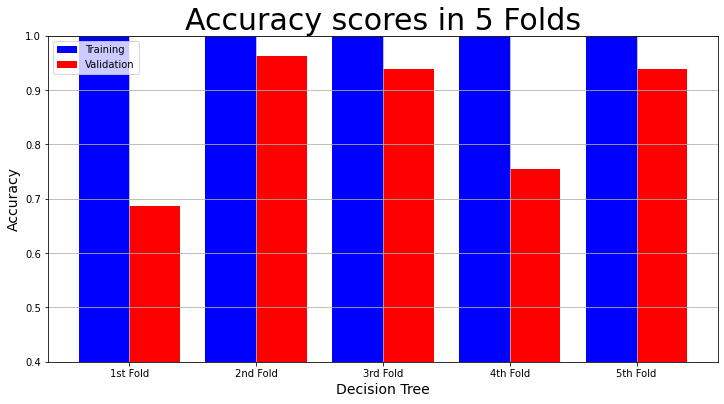

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()


model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            RFC_result["Training Accuracy scores"],
            RFC_result["Validation Accuracy scores"])